In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pymongo import MongoClient

# Loading the Data

In [ ]:
df=pd.read_csv('gender_classification_v7.csv')
client = MongoClient('mongodb://127.0.0.1:27017/')
data=df.to_dict('records')
db=client['people']
collection=db['people']
collection.insert_many(data)
df.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.shape

(5001, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# Checking the NULL values

In [ ]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  5001


,Total Missing,In Percent
long_hair,0,0.0
forehead_width_cm,0,0.0
forehead_height_cm,0,0.0
nose_wide,0,0.0
nose_long,0,0.0
lips_thin,0,0.0
distance_nose_to_lip_long,0,0.0
gender,0,0.0


Since there is no null values we can proceed to the next steps as the data is clean

# EDA Plot the graphs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

CoRelation Graph of the Dataset

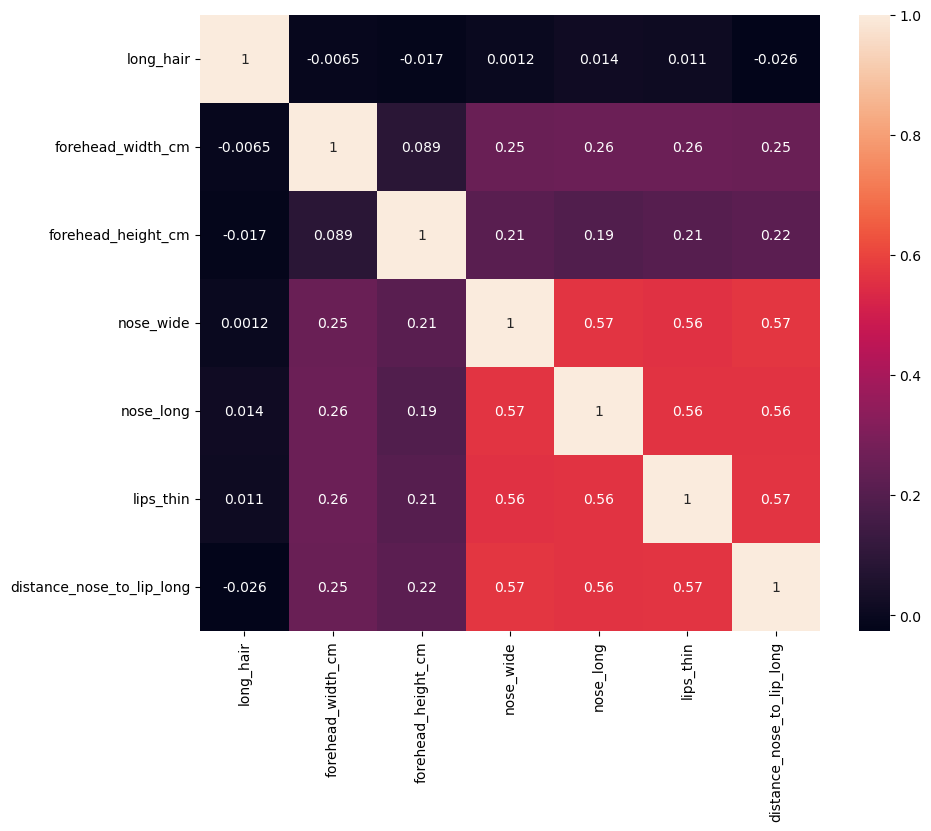

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

Long Hairs have nothing to do with any other Feature. Forehead Width CM and Forehead Height CM are also not correlated with the feature set. Nose Wide, Nose Long, Lips Thin & Gender dosen't have highly strong relation but still the relations are partially strong. But as they are just 0s and 1s we can't count on them.

Pie Chart Between the Classes

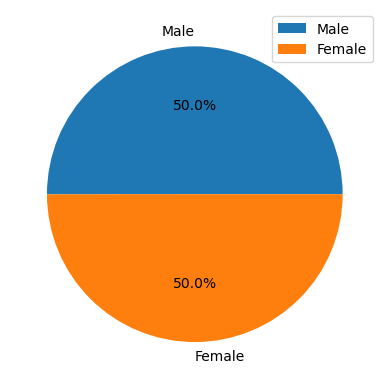

In [ ]:
fig = plt.pie(
    df.gender.value_counts(),
    labels=df.gender.unique(),
    autopct='%1.1f%%'
)
plt.legend()
plt.show()

Equal Numbe rof males andd females in the dataset

Plot for the relation between nose length and the gender

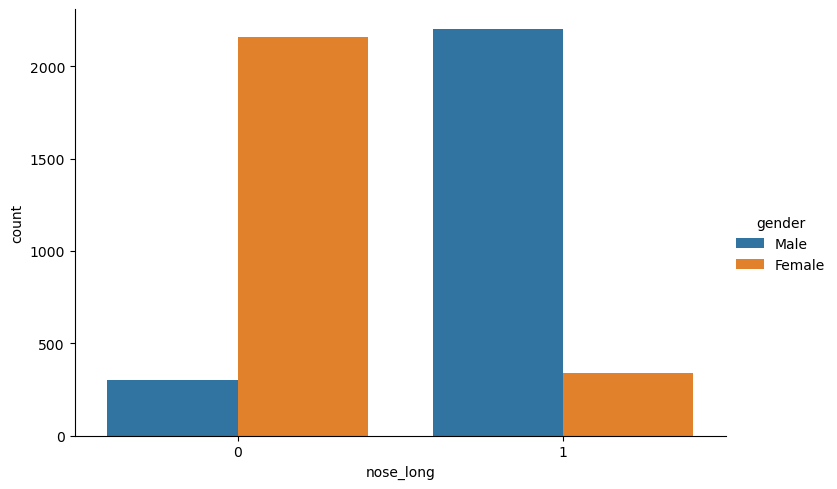

In [ ]:
sns.catplot(
    data=df,
    x='nose_long',
    kind='count',
    hue='gender',
    aspect=1.5
)
plt.show()

Males usually have longer nose than females

Pie chart for percantage of people with long hair

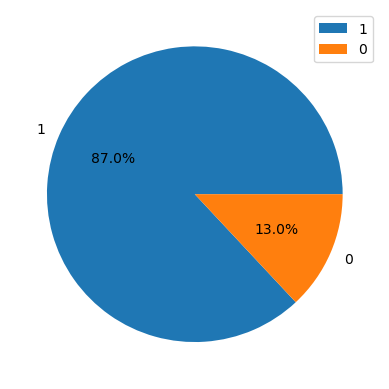

In [ ]:
fig = plt.pie(
    df.long_hair.value_counts(),
    labels=df.long_hair.unique(),
    autopct='%1.1f%%'
)
plt.legend()
plt.show()

87% of the people have long hair

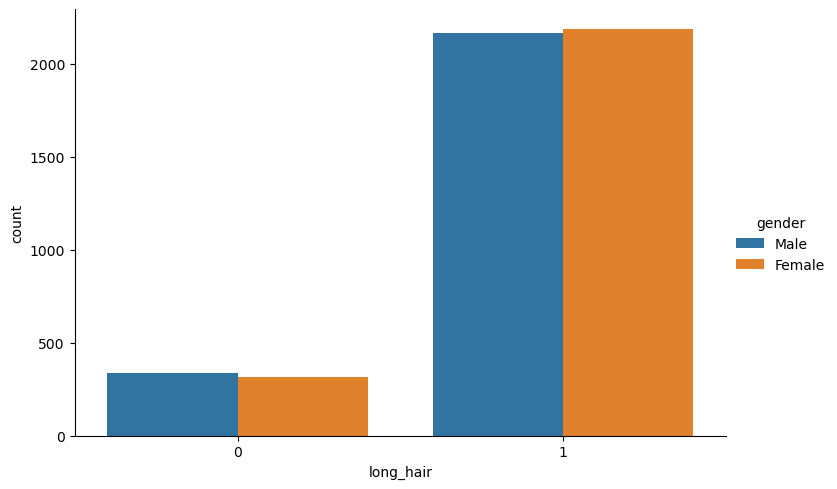

In [ ]:
sns.catplot(
    data=df,
    x='long_hair',
    kind='count',
    hue='gender',
    aspect=1.5
)
plt.show()


If someone have long hairs they are equally likely to be Male and Female and the case is same with short hairs.

Relation between thinness of lips and gender

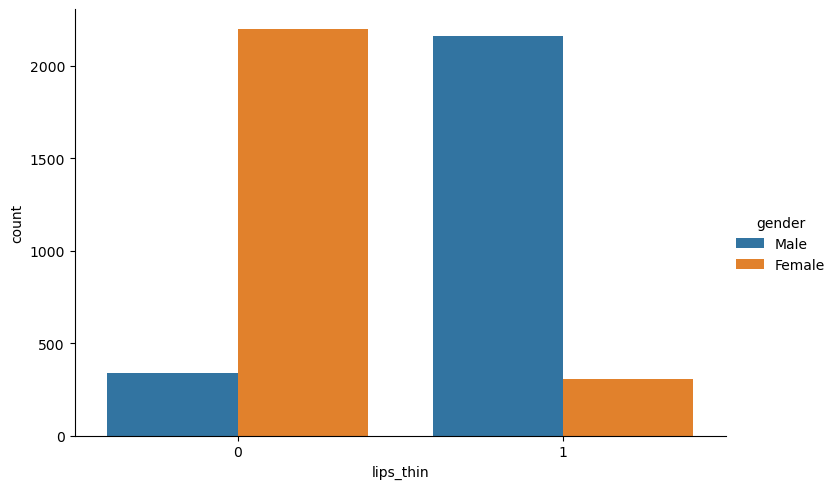

In [ ]:
sns.catplot(
    data=df,
    x='lips_thin',
    kind='count',
    hue='gender',
    aspect=1.5
)
plt.show()

Females have thinner lips than males

Catplot for thin lips vs wide_nose vs long nose vs gender

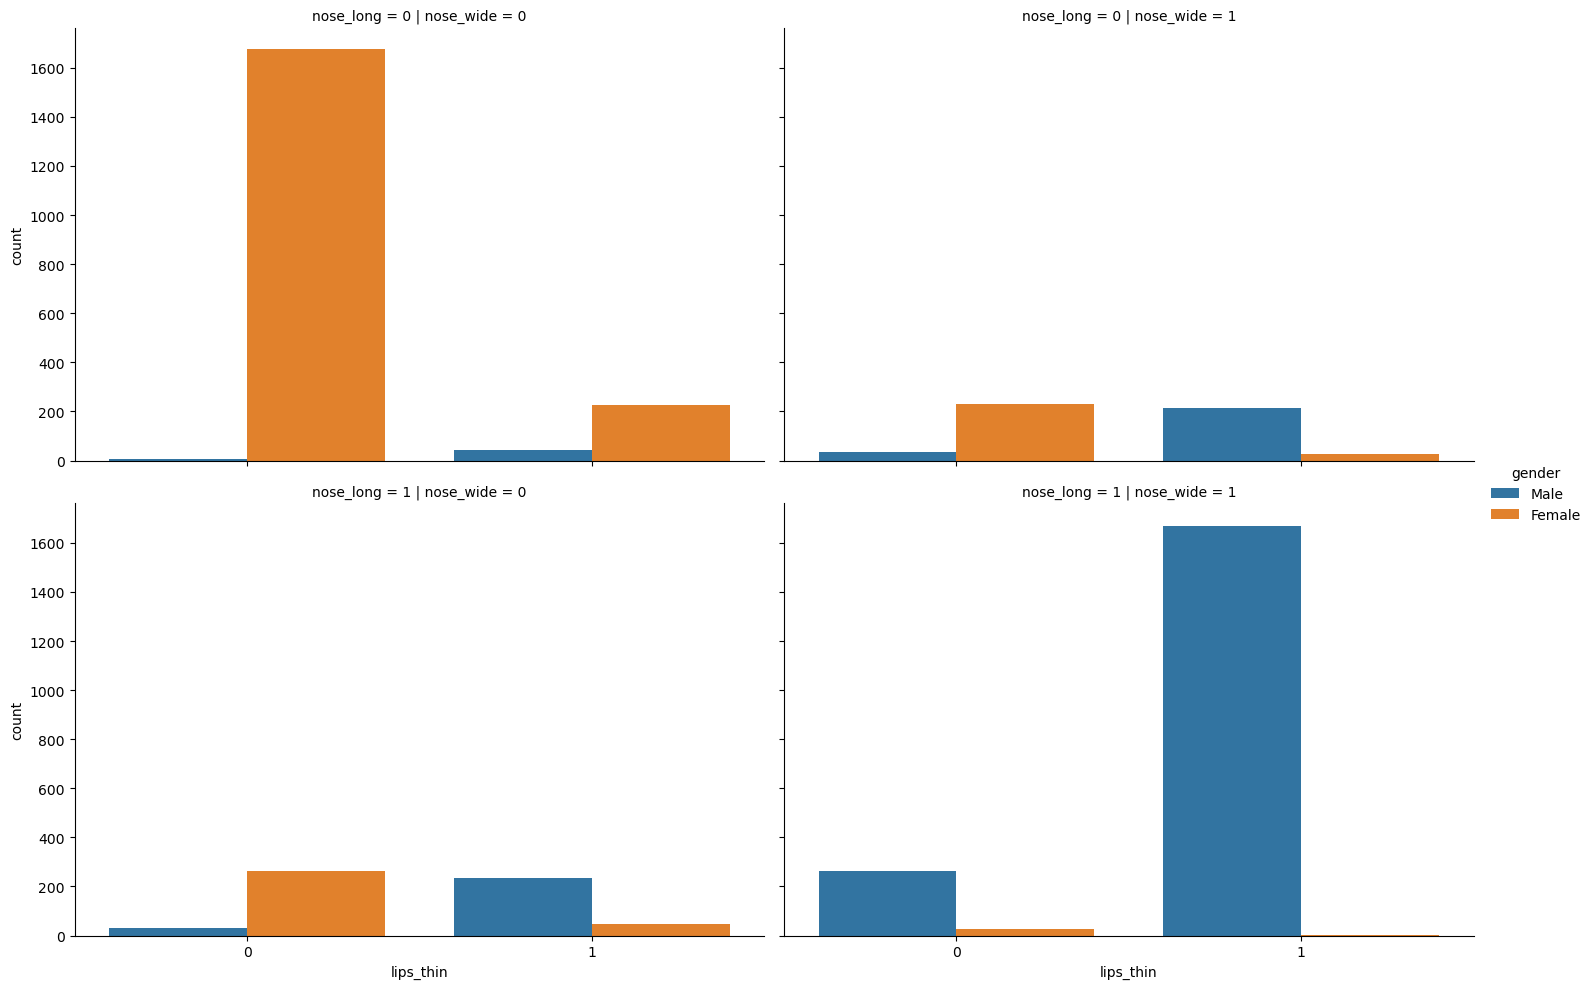

In [ ]:
sns.catplot(
    data=df,
    x='lips_thin',
    kind='count',
    col='nose_wide',
    row='nose_long',
    hue='gender',
    aspect=1.5
)
plt.show()


We can infer the data by visualizing

# Dividing the dataset into training and testing values along with features

In [ ]:
Y=df['gender']
X=df.drop(['gender'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [ ]:
y_train

array([1, 0, 1, ..., 1, 1, 1])

# Training Model Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8364638669104503


# Training Model Using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2=LogisticRegression()
model2.fit(X_train,y_train)
print(model2.score(X_test,y_test))

0.968031968031968


# Training Model Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, criterion='gini')
model3.fit(X_train, y_train)
print(model3.score(X_test, y_test))

0.97002997002997


# Training Model Using Decison Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier() 
model4.fit(X_train, y_train)
print(model4.score(X_test, y_test))

0.965034965034965


# Plot to show the relation between the accuracy of the model using differnt algorithms

In [ ]:
X_axis_value=['Linear Regression','Logistic Regression','Random Forest','Secison Tree']
Y_axis_value=[model.score(X_test,y_test),model2.score(X_test, y_test),model3.score(X_test, y_test),model4.score(X_test, y_test)]

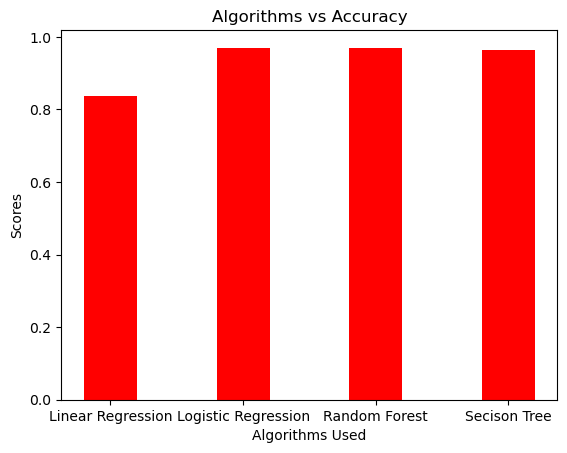

In [ ]:
plt.bar(X_axis_value,Y_axis_value,color='red',width=0.4)
plt.xlabel('Algorithms Used')
plt.ylabel('Scores')
plt.title('Algorithms vs Accuracy')
plt.show()

# Apply Hyperparameter Tuning using GridSearch CV for the Random Forest Algorithm

In [ ]:
model5 = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(model5, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
350 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/p

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
RF_score=clf.best_score_
print(RF_score)

0.9739999999999999
